In [89]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

Now we will take a look to see what are the optimal budget and runtime that will produce the most successful movie

In [90]:
success_data = pd.read_pickle('success.pkl')
success_data

popularity        profit
0      32.985763  1.363529e+09
1      28.419936  2.284364e+08
2      13.112507  1.852382e+08
3      11.173104  1.868178e+09
4       9.335014  1.316249e+09
...          ...           ...
1282    1.549139  1.547778e+08
1283    1.910465  1.301957e+08
1284    1.778746  7.497449e+07
1285    1.198849  6.970000e+07
1286    1.157930  1.383000e+08

[1287 rows x 2 columns]

In [91]:
success_data.info()
popularity_data = success_data[['popularity']]
profit_data = success_data[['profit']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   popularity  1287 non-null   float64
 1   profit      1287 non-null   float64
dtypes: float64(2)
memory usage: 20.2 KB


In [92]:
popularity_data.describe()

popularity
count  1287.000000
mean      1.786022
std       2.172137
min       0.010335
25%       0.664783
50%       1.152354
75%       2.125342
max      32.985763

In [93]:
profit_data.describe()

profit
count  1.287000e+03
mean   1.242409e+08
std    2.183462e+08
min   -4.139124e+08
25%    3.142641e+06
50%    4.524300e+07
75%    1.470070e+08
max    2.544506e+09

In [94]:
factors = pd.read_pickle('factors.pkl')
factors

budget  release_year release_date  runtime month
0     150000000.0          2015   2015-06-09      124    06
1     150000000.0          2015   2015-05-13      120    05
2     110000000.0          2015   2015-03-18      119    03
3     200000000.0          2015   2015-12-15      136    12
4     190000000.0          2015   2015-04-01      137    04
...           ...           ...          ...      ...   ...
1282    7000000.0          1973   1973-07-05      121    07
1283   11000000.0          1965   2065-12-16      130    12
1284    7000000.0          1969   2069-12-12      142    12
1285     300000.0          1978   1978-10-25       91    10
1286    2700000.0          1978   1978-07-27      109    07

[1287 rows x 5 columns]

In [95]:
budget = pd.DataFrame(factors['budget']).sort_values(by = "budget", ascending = False)
budget

budget
404   425000000.0
537   380000000.0
1078  300000000.0
14    280000000.0
757   260000000.0
...           ...
275          75.0
710          68.0
1268         30.0
412           3.0
662           1.0

[1287 rows x 1 columns]

In [96]:
runtime = pd.DataFrame(factors['runtime'])
runtime

runtime
0         124
1         120
2         119
3         136
4         137
...       ...
1282      121
1283      130
1284      142
1285       91
1286      109

[1287 rows x 1 columns]

In [97]:
jointDF = pd.concat([budget, popularity_data], axis = 1)
jointDF

budget  popularity
404   425000000.0    0.250540
537   380000000.0    4.955130
1078  300000000.0    4.965391
14    280000000.0    5.944927
757   260000000.0    1.588457
...           ...         ...
275          75.0    0.278387
710          68.0    0.958182
1268         30.0    1.072912
412           3.0    0.028456
662           1.0    0.520430

[1287 rows x 2 columns]

<AxesSubplot:xlabel='budget', ylabel='popularity'>

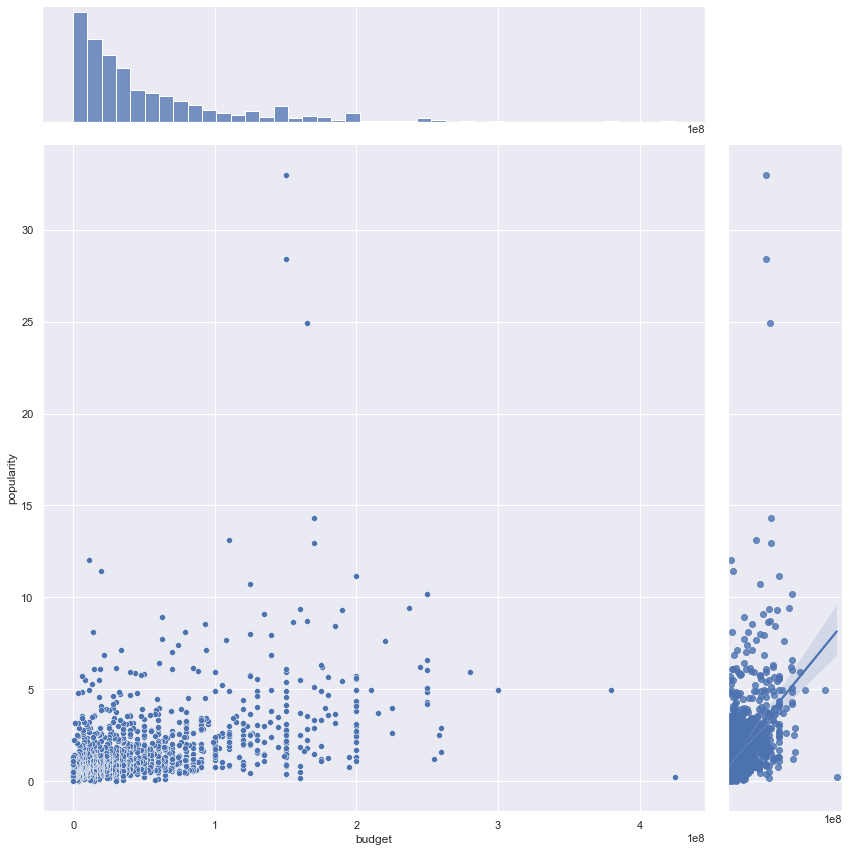

In [98]:
sb.jointplot(data = jointDF, x = "budget", y = "popularity", height = 12)
x, y = pd.Series(jointDF["budget"], name="budget").item, pd.Series(jointDF["popularity"], name="populairty").item
sb.regplot(x="budget", y="popularity", data=jointDF)


In [99]:
jointDF.corr()

budget  popularity
budget      1.000000    0.432791
popularity  0.432791    1.000000

In [100]:
jointDF2 = pd.concat([budget, profit_data], axis = 1).reindex(budget.index)
jointDF2

budget        profit
404   425000000.0 -4.139124e+08
537   380000000.0  6.416830e+08
1078  300000000.0  6.610000e+08
14    280000000.0  1.125036e+09
757   260000000.0  2.413910e+07
...           ...           ...
275          75.0  5.900000e+01
710          68.0  1.250000e+02
1268         30.0  1.700000e+02
412           3.0  4.000000e+01
662           1.0  1.377000e+03

[1287 rows x 2 columns]

<AxesSubplot:xlabel='budget', ylabel='profit'>

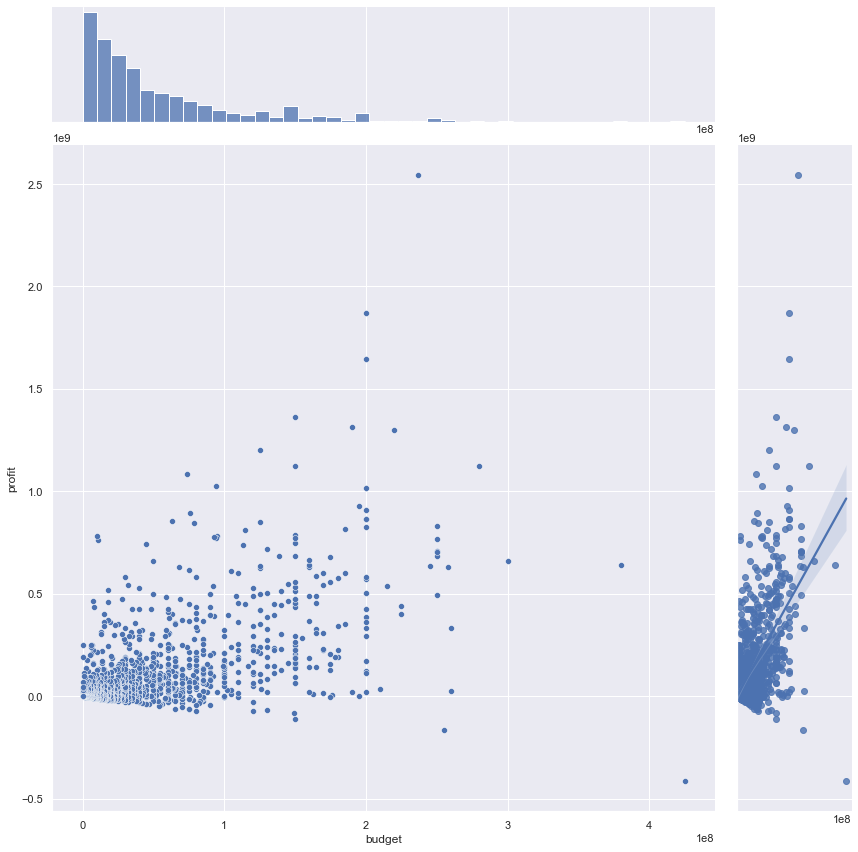

In [101]:
sb.jointplot(data = jointDF2, x = "budget", y = "profit", height = 12)
x, y = pd.Series(jointDF2["budget"], name="budget").item, pd.Series(jointDF2["profit"], name="profit").item
sb.regplot(x="budget", y="profit", data=jointDF2)

In [102]:
jointDF2.corr()

budget   profit
budget  1.00000  0.56916
profit  0.56916  1.00000

In [103]:
jointDF3 = pd.concat([runtime, popularity_data], axis = 1).reindex(budget.index)
jointDF3

runtime  popularity
404       100    0.250540
537       136    4.955130
1078      169    4.965391
14        141    5.944927
757       132    1.588457
...       ...         ...
275       129    0.278387
710       124    0.958182
1268      134    1.072912
412        87    0.028456
662        90    0.520430

[1287 rows x 2 columns]

<AxesSubplot:xlabel='runtime', ylabel='popularity'>

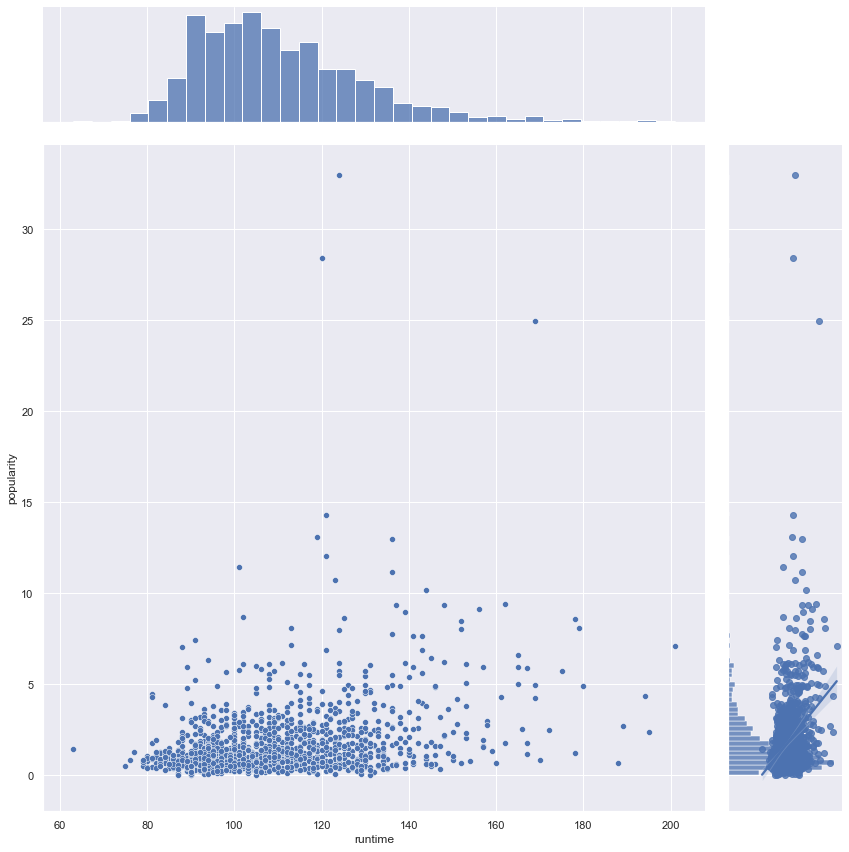

In [104]:
sb.jointplot(data = jointDF3, x = "runtime", y = "popularity", height = 12)
x, y = pd.Series(jointDF3["runtime"], name="budget").item, pd.Series(jointDF3["runtime"], name="populairty").item
sb.regplot(x="runtime", y="popularity", data=jointDF3)

In [105]:
jointDF3.corr()

runtime  popularity
runtime     1.00000     0.32239
popularity  0.32239     1.00000

In [106]:
jointDF4 = pd.concat([runtime, profit_data], axis = 1).reindex(budget.index)
jointDF4

runtime        profit
404       100 -4.139124e+08
537       136  6.416830e+08
1078      169  6.610000e+08
14        141  1.125036e+09
757       132  2.413910e+07
...       ...           ...
275       129  5.900000e+01
710       124  1.250000e+02
1268      134  1.700000e+02
412        87  4.000000e+01
662        90  1.377000e+03

[1287 rows x 2 columns]

<AxesSubplot:xlabel='runtime', ylabel='profit'>

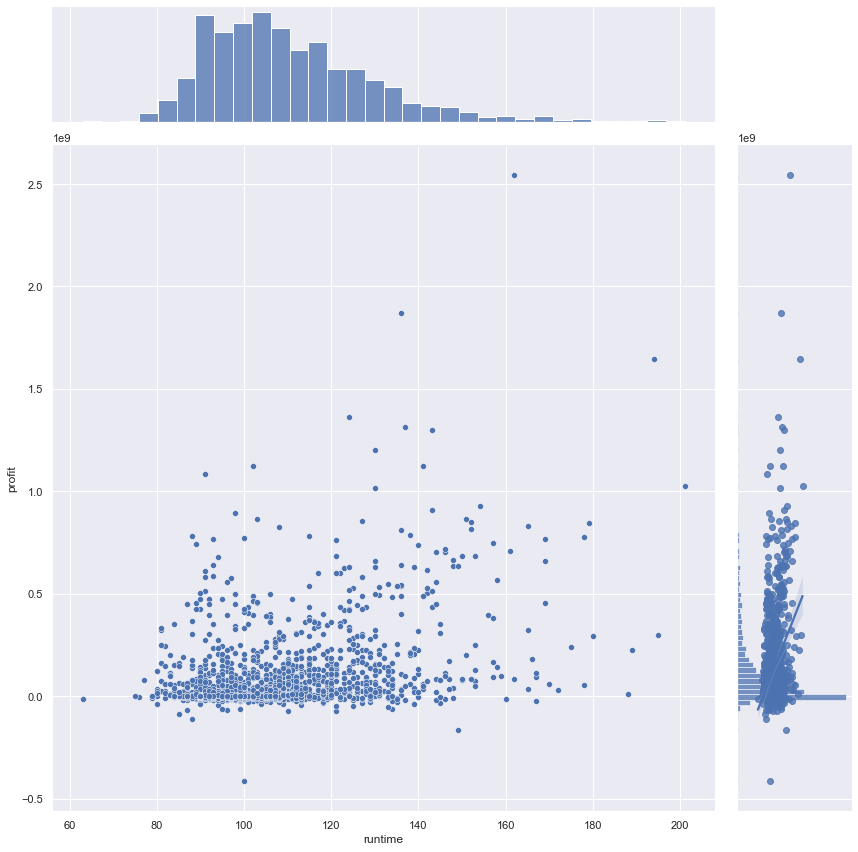

In [107]:
sb.jointplot(data = jointDF4, x = "runtime", y = "profit", height = 12)
x, y = pd.Series(jointDF4["runtime"], name="profit").item, pd.Series(jointDF4["runtime"], name="profit").item
sb.regplot(x="runtime", y="profit", data=jointDF4)

In [108]:
jointDF4.corr()

runtime    profit
runtime  1.000000  0.346323
profit   0.346323  1.000000

In [109]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()

In [110]:
popularity_threshold = success_data[['popularity']].quantile(0.75)
success_data[['popular?']] = success_data[['popularity']] >= popularity_threshold
profit_threshold = success_data[['profit']].quantile(0.75)
success_data[['profitable?']] = success_data[['profit']] >= profit_threshold
success_data



popularity        profit  popular?  profitable?
0      32.985763  1.363529e+09      True         True
1      28.419936  2.284364e+08      True         True
2      13.112507  1.852382e+08      True         True
3      11.173104  1.868178e+09      True         True
4       9.335014  1.316249e+09      True         True
...          ...           ...       ...          ...
1282    1.549139  1.547778e+08     False         True
1283    1.910465  1.301957e+08     False        False
1284    1.778746  7.497449e+07     False        False
1285    1.198849  6.970000e+07     False        False
1286    1.157930  1.383000e+08     False        False

[1287 rows x 4 columns]

In [111]:
jointDF5 = pd.concat([success_data, budget, runtime], axis = 1).reindex(budget.index)
jointDF5

popularity        profit  popular?  profitable?       budget  runtime
404     0.250540 -4.139124e+08     False        False  425000000.0      100
537     4.955130  6.416830e+08      True         True  380000000.0      136
1078    4.965391  6.610000e+08      True         True  300000000.0      169
14      5.944927  1.125036e+09      True         True  280000000.0      141
757     1.588457  2.413910e+07     False        False  260000000.0      132
...          ...           ...       ...          ...          ...      ...
275     0.278387  5.900000e+01     False        False         75.0      129
710     0.958182  1.250000e+02     False        False         68.0      124
1268    1.072912  1.700000e+02     False        False         30.0      134
412     0.028456  4.000000e+01     False        False          3.0       87
662     0.520430  1.377000e+03     False        False          1.0       90

[1287 rows x 6 columns]

In [112]:
budget = pd.DataFrame(jointDF5['budget'])
runtime = pd.DataFrame(jointDF5['runtime'])
popular = pd.DataFrame(jointDF5['popular?'])
profitable = pd.DataFrame(jointDF5['profitable?'])


/Users/liekzhewong/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='budget', ylabel='popular?'>

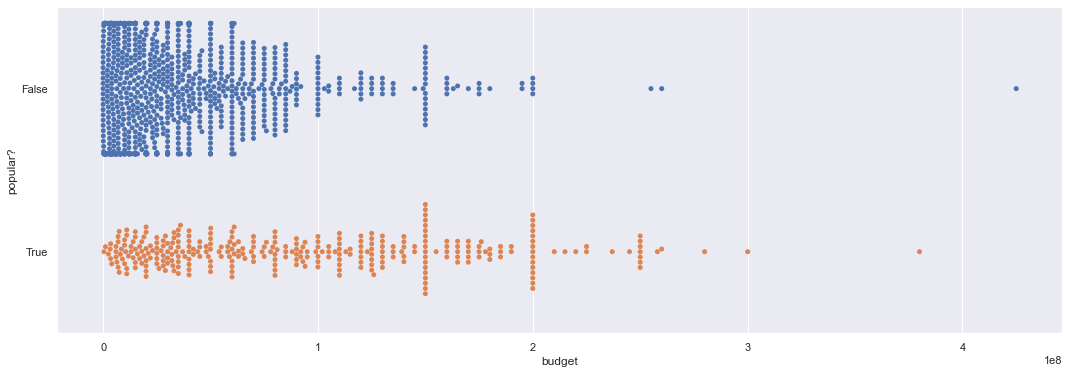

In [113]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "budget", y = "popular?", data = jointDF5, orient = "h")

In [114]:
X1_train, X1_test, y1_train, y1_test = train_test_split(budget, profitable, test_size = 0.2)
tree1 = DecisionTreeClassifier(max_depth= 5)    #* tree1 : max depth 5
tree1.fit(budget, popular)

f = plt.figure(figsize=(200,100))
plot_tree(tree1, filled=True, rounded=True, 
          feature_names=["budget"], 
          class_names=["No","Yes"])

[Text(0.5153061224489796, 0.9166666666666666, 'budget <= 87500000.0\ngini = 0.375\nsamples = 1287\nvalue = [965, 322]\nclass = No'),
 Text(0.22448979591836735, 0.75, 'budget <= 30750000.0\ngini = 0.269\nsamples = 1050\nvalue = [882, 168]\nclass = No'),
 Text(0.10204081632653061, 0.5833333333333334, 'budget <= 5500000.0\ngini = 0.209\nsamples = 632\nvalue = [557, 75]\nclass = No'),
 Text(0.04081632653061224, 0.4166666666666667, 'budget <= 350000.0\ngini = 0.087\nsamples = 153\nvalue = [146, 7]\nclass = No'),
 Text(0.02040816326530612, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]\nclass = No'),
 Text(0.061224489795918366, 0.25, 'budget <= 437500.0\ngini = 0.104\nsamples = 127\nvalue = [120, 7]\nclass = No'),
 Text(0.04081632653061224, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.08163265306122448, 0.08333333333333333, 'gini = 0.091\nsamples = 126\nvalue = [120, 6]\nclass = No'),
 Text(0.16326530612244897, 0.4166666666666667, 'budget <= 2950000

True Positive Rate 	: 0.4817813765182186
False Positive Rate 	: 0.056265984654731455
True Negative Rate 	: 0.9437340153452686
False Negative Rate 	: 0.5182186234817814
Classification Accuracy 	: 0.8328474246841594


<AxesSubplot:>

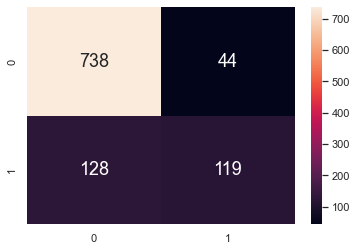

In [115]:
train1_pred = tree1.predict(X1_train)

FP_TRAIN1 = confusion_matrix(y1_train, train1_pred)[0][1]
TP_TRAIN1 = confusion_matrix(y1_train, train1_pred)[1][1]
FN_TRAIN1 =confusion_matrix(y1_train, train1_pred)[1][0]
TN_TRAIN1 = confusion_matrix(y1_train, train1_pred)[0][0]
TPR_TRAIN1= (TP_TRAIN1)/(TP_TRAIN1+FN_TRAIN1)
FPR_TRAIN1 = (FP_TRAIN1)/(FP_TRAIN1+TN_TRAIN1)

print("True Positive Rate \t:", TPR_TRAIN1)
print("False Positive Rate \t:", FPR_TRAIN1)
print("True Negative Rate \t:", 1-FPR_TRAIN1)
print("False Negative Rate \t:", 1-TPR_TRAIN1)
# Print the Classification Accuracy
print("Classification Accuracy \t:", tree1.score(X1_train, y1_train))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y1_train, train1_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

/Users/liekzhewong/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='budget', ylabel='profitable?'>

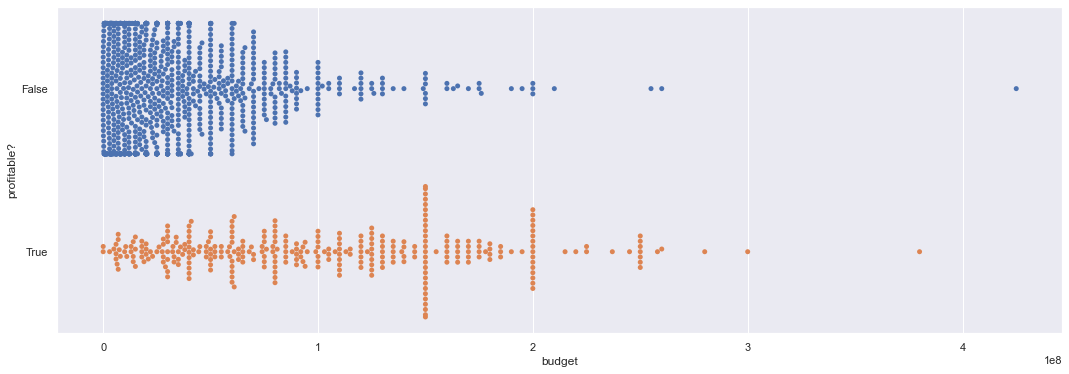

In [116]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "budget", y = "profitable?", data = jointDF5, orient = "h")

In [117]:
X2_train, X2_test, y2_train, y2_test = train_test_split(budget, profitable, test_size = 0.2)
tree2 = DecisionTreeClassifier(max_depth= 5)    # tree1 : max depth 5
tree2.fit(X2_train, y2_train)

f = plt.figure(figsize=(200,200))

plot_tree(tree2, filled=True, rounded=True, 
          feature_names=["budget"], 
          class_names=["No","Yes"])

[Text(0.5833333333333334, 0.9166666666666666, 'budget <= 73250000.0\ngini = 0.373\nsamples = 1029\nvalue = [774, 255]\nclass = No'),
 Text(0.3333333333333333, 0.75, 'budget <= 25550000.0\ngini = 0.22\nsamples = 778\nvalue = [680, 98]\nclass = No'),
 Text(0.16666666666666666, 0.5833333333333334, 'budget <= 5500000.0\ngini = 0.128\nsamples = 437\nvalue = [407, 30]\nclass = No'),
 Text(0.08333333333333333, 0.4166666666666667, 'budget <= 26000.0\ngini = 0.05\nsamples = 118\nvalue = [115, 3]\nclass = No'),
 Text(0.041666666666666664, 0.25, 'budget <= 11500.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = No'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = No'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.125, 0.25, 'budget <= 2950000.0\ngini = 0.018\nsamples = 108\nvalue = [107, 1]\nclass = No'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 55\nvalue 

#### Train data

True Positive Rate 	: 0.4549019607843137
False Positive Rate 	: 0.04392764857881137
True Negative Rate 	: 0.9560723514211886
False Negative Rate 	: 0.5450980392156863
Classification Accuracy 	: 0.8318756073858115


<AxesSubplot:>

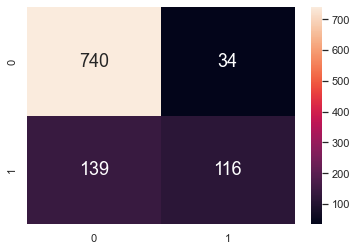

In [118]:
train2_pred = tree2.predict(X2_train)

FP_TRAIN2 = confusion_matrix(y2_train, train2_pred)[0][1]
TP_TRAIN2 = confusion_matrix(y2_train, train2_pred)[1][1]
FN_TRAIN2 =confusion_matrix(y2_train, train2_pred)[1][0]
TN_TRAIN2 = confusion_matrix(y2_train, train2_pred)[0][0]
TPR_TRAIN2= (TP_TRAIN2)/(TP_TRAIN2+FN_TRAIN2)
FPR_TRAIN2 = (FP_TRAIN2)/(FP_TRAIN2+TN_TRAIN2)

print("True Positive Rate \t:", TPR_TRAIN2)
print("False Positive Rate \t:", FPR_TRAIN2)
print("True Negative Rate \t:", 1-FPR_TRAIN2)
print("False Negative Rate \t:", 1-TPR_TRAIN2)
# Print the Classification Accuracy
print("Classification Accuracy \t:", tree2.score(X2_train, y2_train))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y2_train, train2_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

<AxesSubplot:xlabel='runtime', ylabel='popular?'>

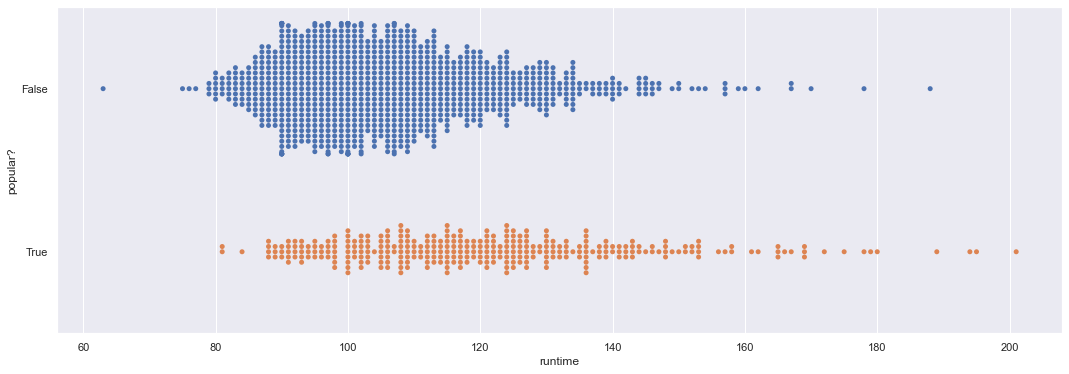

In [119]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "runtime", y = "popular?", data = jointDF5, orient = "h")

In [120]:

# tree1 = DecisionTreeClassifier(max_depth= 4)    #* tree1 : max depth 4
# tree1.fit(runtime, popular)

# f = plt.figure(figsize=(64,64))
# plot_tree(tree1, filled=True, rounded=True, 
#           feature_names=["runtime"], 
#           class_names=["No","Yes"])

<AxesSubplot:xlabel='runtime', ylabel='profitable?'>

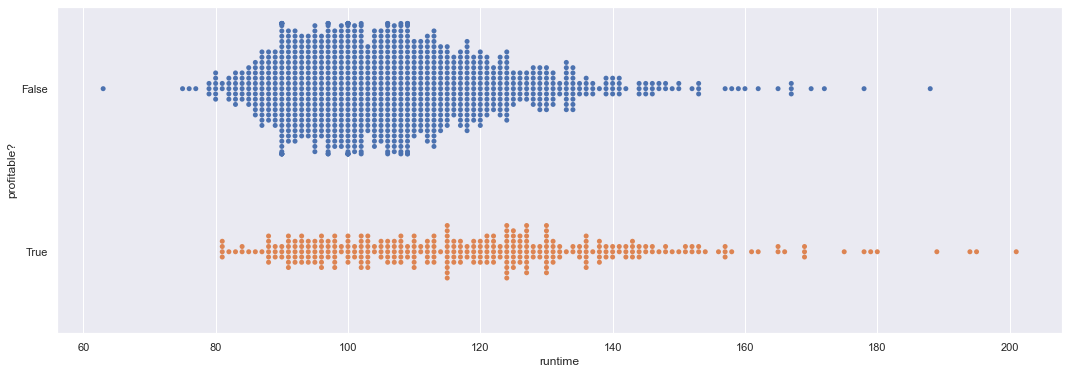

In [121]:
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "runtime", y = "profitable?", data = jointDF5, orient = "h")

In [122]:
# tree1 = DecisionTreeClassifier(max_depth= 4)    #* tree1 : max depth 4
# tree1.fit(runtime, profitable)

# f = plt.figure(figsize=(12,12))
# plot_tree(tree1, filled=True, rounded=True, 
#           feature_names=["runtime"], 
#           class_names=["No","Yes"])